<a href="https://colab.research.google.com/github/tnrezende/trabalho-science/blob/main/C%C3%B3pia_de_TRABALHO_FINAL_para_edicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEITURA DOS DADOS**

In [ ]:
import pandas as pd
from google.colab import files  # Para fazer upload de arquivos no Google Colab

# 1. Fazer upload da planilha local
uploaded = files.upload()
# 2. Carregar os dados da planilha (supondo que seja um arquivo CSV)
file_name = list(uploaded.keys())[0]  # Pega o nome do primeiro arquivo carregado
df = pd.read_csv(file_name)
# Verificando as primeiras linhas
print(df.head())

# Verificando informações básicas
print(df.info())

Saving clientes.csv to clientes.csv
   cliente_id  idade  renda_mensal        cidade tipo_cliente  ultima_compra  \
0           1     56          2590      Curitiba    ocasional             63   
1           2     69          5305        Manaus    frequente            104   
2           3     46          3865  Porto Alegre    frequente            339   
3           4     32          2866  Porto Alegre    ocasional            359   
4           5     60          4030  Porto Alegre      premium            156   

   frequencia_compras  total_gasto  
0                  12         6779  
1                   4         7310  
2                   8         4170  
3                   7         4619  
4                   7         3869  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cliente_id          1000 non-null   int64 
 1   idade  

# CLUSTER ANALYSIS

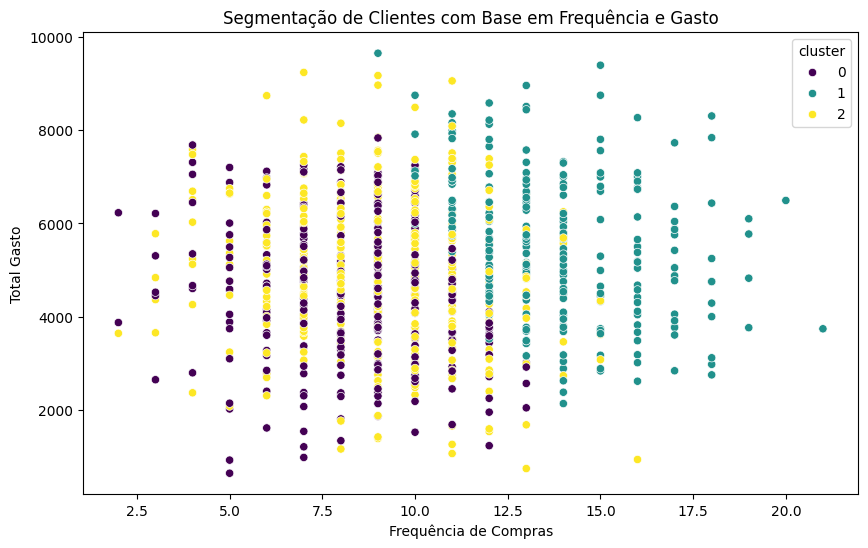

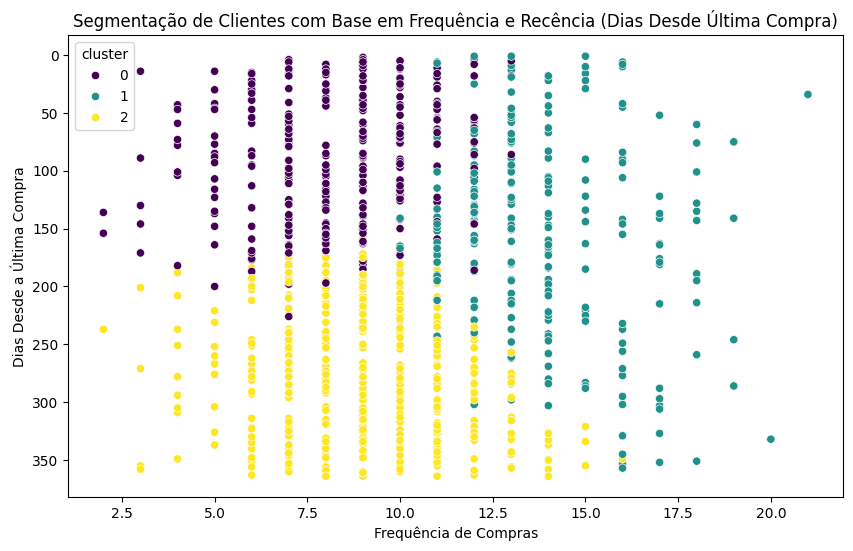

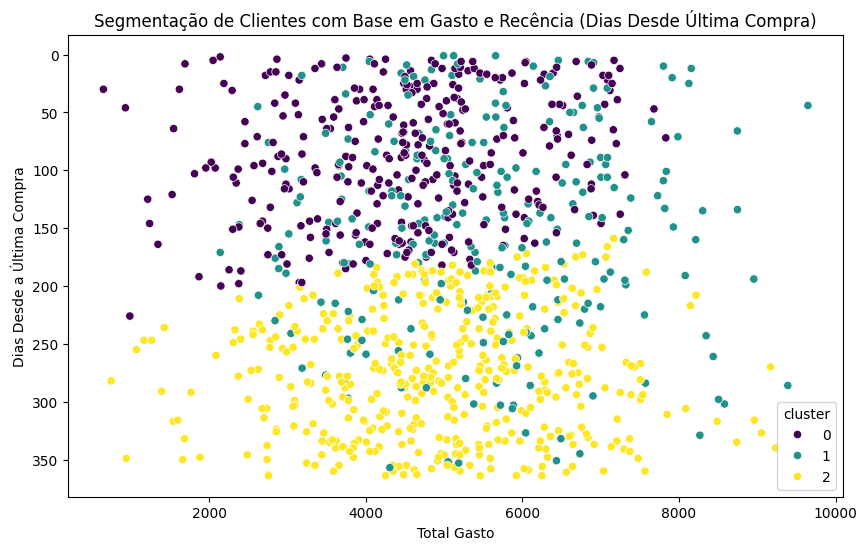


Centróides dos Clusters:
   frequencia_compras  total_gasto  ultima_compra
0            8.253918  4498.263323      88.216301
1           13.821429  5526.250000     148.472222
2            9.023310  4936.333333     275.937063

Interpretação dos Segmentos de Clientes:

Cluster 0:
  Frequência Média de Compras: 8.25
  Gasto Total Médio: R$4498.26
  Média de Dias Desde a Última Compra: 88.22
  **Possível Segmento: Outros Clientes** (Perfil misto)

Cluster 1:
  Frequência Média de Compras: 13.82
  Gasto Total Médio: R$5526.25
  Média de Dias Desde a Última Compra: 148.47
  **Possível Segmento: Clientes Fiéis e de Alto Valor** (Compram com frequência, gastam bastante e compraram recentemente)

Cluster 2:
  Frequência Média de Compras: 9.02
  Gasto Total Médio: R$4936.33
  Média de Dias Desde a Última Compra: 275.94
  **Possível Segmento: Clientes Inativos** (Não compram há um tempo)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Selecionando variáveis para clustering
X_cluster = df[['frequencia_compras', 'total_gasto', 'ultima_compra']].copy()

# Converte 'ultima_compra' para fator numerico
# Checa se 'ultima_compra' é uma coluna tipo de data
if pd.api.types.is_datetime64_any_dtype(X_cluster['ultima_compra']):
    # Converte para dias desde a data de referencia(e.g., a data mínima)
    min_date = X_cluster['ultima_compra'].min()
    X_cluster['ultima_compra'] = (X_cluster['ultima_compra'] - min_date).dt.days
    # OR
    # X_cluster['ultima_compra'] = X_cluster['ultima_compra'].astype('int64') // 10**9 # total seconds


# Normalizando os dados
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Aplicando K-means
# Escolhendo o número de clusters (você pode precisar ajustar isso)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Adicionado n_init para evitar Warning
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualizando os clusters (para as duas principais dimensões)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequencia_compras', y='total_gasto', hue='cluster', data=df, palette='viridis')
plt.title('Segmentação de Clientes com Base em Frequência e Gasto')
plt.xlabel('Frequência de Compras')
plt.ylabel('Total Gasto')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequencia_compras', y='ultima_compra', hue='cluster', data=df, palette='viridis')
plt.title('Segmentação de Clientes com Base em Frequência e Recência (Dias Desde Última Compra)')
plt.xlabel('Frequência de Compras')
plt.ylabel('Dias Desde a Última Compra')
plt.gca().invert_yaxis() # Inverter o eixo y para melhor interpretação (menor valor = mais recente)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_gasto', y='ultima_compra', hue='cluster', data=df, palette='viridis')
plt.title('Segmentação de Clientes com Base em Gasto e Recência (Dias Desde Última Compra)')
plt.xlabel('Total Gasto')
plt.ylabel('Dias Desde a Última Compra')
plt.gca().invert_yaxis() # Inverter o eixo y para melhor interpretação (menor valor = mais recente)
plt.show()

# Interpretando os resultados (análise dos centróides dos clusters)
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['frequencia_compras', 'total_gasto', 'ultima_compra'])
print("\nCentróides dos Clusters:")
print(centroids)

# Análise dos segmentos de clientes (interpretação com base nos centróides)
print("\nInterpretação dos Segmentos de Clientes:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    frequencia = centroids.loc[i, 'frequencia_compras']
    gasto = centroids.loc[i, 'total_gasto']
    recencia = centroids.loc[i, 'ultima_compra']

    print(f"  Frequência Média de Compras: {frequencia:.2f}")
    print(f"  Gasto Total Médio: R${gasto:.2f}")
    print(f"  Média de Dias Desde a Última Compra: {recencia:.2f}")

    if frequencia > centroids['frequencia_compras'].mean() and gasto > centroids['total_gasto'].mean() and recencia < centroids['ultima_compra'].mean():
        print("  **Possível Segmento: Clientes Fiéis e de Alto Valor** (Compram com frequência, gastam bastante e compraram recentemente)")
    elif recencia > centroids['ultima_compra'].mean():
        print("  **Possível Segmento: Clientes Inativos** (Não compram há um tempo)")
    elif gasto > centroids['total_gasto'].mean() and recencia < centroids['ultima_compra'].mean():
        print("  **Possível Segmento: Clientes de Alto Valor Recentes** (Gastam bastante e compraram recentemente)")
    elif frequencia > centroids['frequencia_compras'].mean() and recencia < centroids['ultima_compra'].mean():
        print("  **Possível Segmento: Clientes Fiéis Recentes** (Compram com frequência e recentemente)")
    else:
        print("  **Possível Segmento: Outros Clientes** (Perfil misto)")

# CONJOINT ANALYSIS

Carregue o arquivo CSV da tabela de Campanhas:


Saving campanhas.csv to campanhas (2).csv

Arquivo 'campanhas (2).csv' carregado com sucesso.

Carregue o arquivo CSV da tabela de Transações:


Saving transacoes.csv to transacoes.csv

Arquivo 'transacoes.csv' carregado com sucesso.

Carregue o arquivo CSV da tabela de Clientes:


Saving clientes.csv to clientes.csv

Arquivo 'clientes.csv' carregado com sucesso.

--- Análise de Preferências de Campanhas (Adaptado aos Dados Reais) ---

Desempenho das Campanhas (Taxa de Conversão):
    nome_campanha  taxa_conversao
1           natal       35.587762
0    black_friday       15.315871
5        ano_novo       10.287846
4  volta_as_aulas        8.386821
6    sem_campanha        8.140814


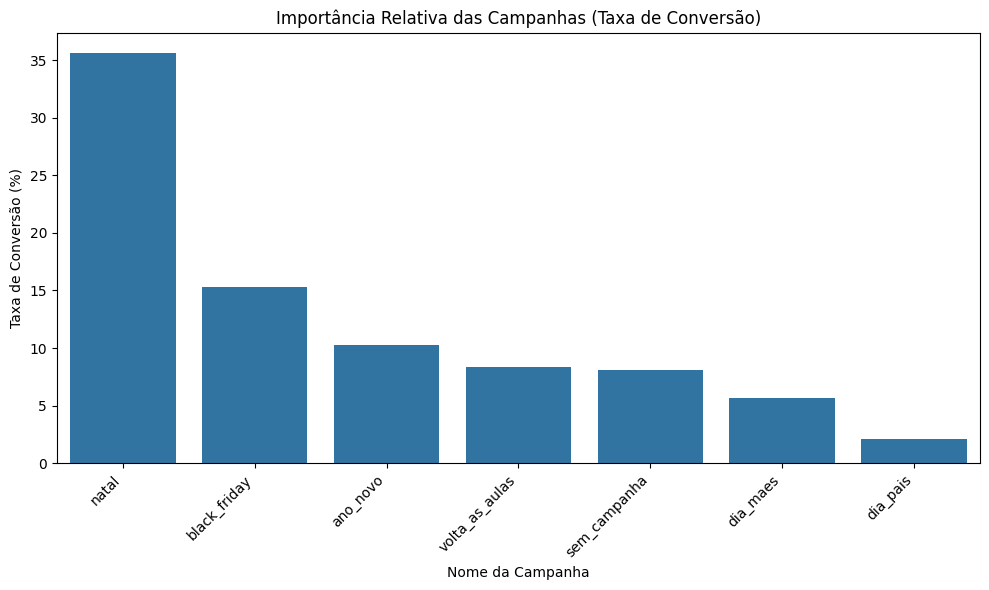


'Preferência' por Campanhas por Tipo de Cliente (Proporção de Participação):
tipo_cliente    frequente  ocasional   premium
campanha                                      
ano_novo         0.092824   0.100860  0.105033
black_friday     0.090849   0.102183  0.118162
dia_maes         0.098091   0.105159  0.074398
dia_pais         0.118499   0.097884  0.109409
natal            0.095458   0.095899  0.105033
sem_campanha     0.404213   0.408730  0.411379
volta_as_aulas   0.100066   0.089286  0.076586


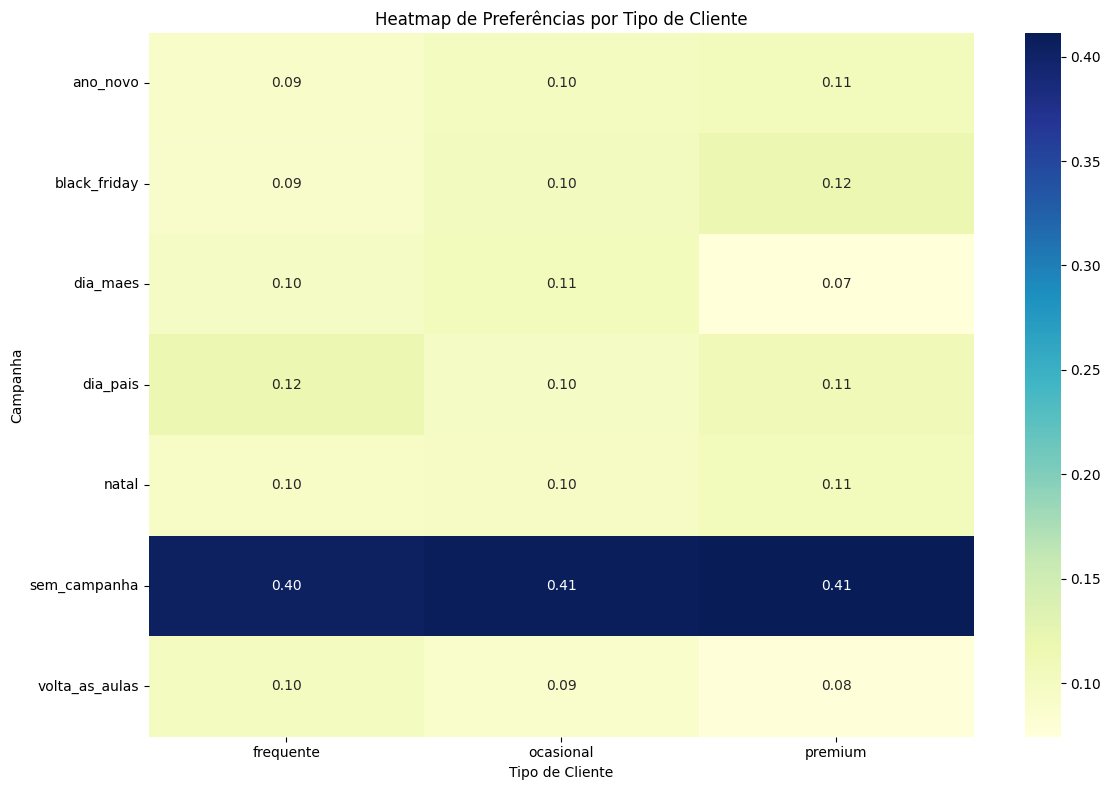


Considerações Adicionais:
- A taxa de conversão agora é calculada diretamente usando a coluna 'conversao' da tabela de campanhas.
- A 'importância relativa' das campanhas no gráfico de barras reflete essa taxa de conversão.
- O heatmap de preferências por tipo de cliente permanece o mesmo, mostrando a proporção de participação.
- Esta análise continua sendo uma forma indireta de inferir preferências.
- Para uma análise conjunta real, seria necessário coletar dados específicos sobre as preferências dos clientes em relação a diferentes combinações de atributos de campanha.
- Realizar testes A/B e pesquisas diretas com os clientes são cruciais para validar essas inferências.


In [ ]:
import pandas as pd
from google.colab import files
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nomes das colunas (conforme identificado nas discussões anteriores)
coluna_id_campanha = 'campanha_id'
coluna_nome_campanha = 'nome_campanha'
coluna_custo_campanha = 'custo_campanha'
coluna_alcance = 'alcance'
coluna_conversao = 'conversao'  # Usando a coluna 'conversao' diretamente de df_campanhas
coluna_id_transacao = 'transacao_id'
coluna_id_cliente_transacao = 'cliente_id'
coluna_data_compra = 'data_compra'
coluna_valor_compra = 'valor_compra'
coluna_campanha_transacao = 'campanha'
coluna_id_cliente = 'cliente_id'
coluna_idade = 'idade'
coluna_renda_mensal = 'renda_mensal'
coluna_cidade = 'cidade'
coluna_tipo_cliente = 'tipo_cliente'

# Função para carregar um DataFrame a partir de um arquivo CSV
def carregar_csv(nome_arquivo):
    uploaded = files.upload()
    nome_arquivo_carregado = list(uploaded.keys())[0]
    df = pd.read_csv(nome_arquivo_carregado)
    print(f"\nArquivo '{nome_arquivo_carregado}' carregado com sucesso.")
    return df

# Carregar as tabelas
print("Carregue o arquivo CSV da tabela de Campanhas:")
df_campanhas = carregar_csv("campanhas.csv")

print("\nCarregue o arquivo CSV da tabela de Transações:")
df_transacoes = carregar_csv("transacoes.csv")

print("\nCarregue o arquivo CSV da tabela de Clientes:")
df_clientes = carregar_csv("clientes.csv")

# --- Análise de Preferências de Campanhas (Adaptado aos Dados Reais) ---

print("\n--- Análise de Preferências de Campanhas (Adaptado aos Dados Reais) ---")

# 1. Desempenho das Campanhas (Taxa de Conversão)
df_campanhas['taxa_conversao'] = (df_campanhas[coluna_conversao] / df_campanhas[coluna_alcance]) * 100
df_campanhas['taxa_conversao'] = df_campanhas['taxa_conversao'].replace([np.inf, -np.inf], 0).fillna(0)

print("\nDesempenho das Campanhas (Taxa de Conversão):")
print(df_campanhas[[coluna_nome_campanha, 'taxa_conversao']].sort_values(by='taxa_conversao', ascending=False).head())

# Gráfico de barras mostrando a importância relativa das campanhas (usando a taxa de conversão como métrica de "importância")
plt.figure(figsize=(10, 6))
sns.barplot(x=coluna_nome_campanha, y='taxa_conversao', data=df_campanhas.sort_values(by='taxa_conversao', ascending=False))
plt.title('Importância Relativa das Campanhas (Taxa de Conversão)')
plt.xlabel('Nome da Campanha')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Relação entre Tipo de Cliente e Campanhas (Inferindo Preferências de Segmentos)
df_transacoes_merged = pd.merge(df_transacoes, df_clientes, left_on=coluna_id_cliente_transacao, right_on=coluna_id_cliente, how='left')

preferencia_tipo_cliente = df_transacoes_merged.groupby([coluna_campanha_transacao, coluna_tipo_cliente]).size().unstack(fill_value=0)
total_por_tipo = preferencia_tipo_cliente.sum(axis=0)
preferencia_tipo_cliente_pct = preferencia_tipo_cliente.apply(lambda x: x / total_por_tipo, axis=1)

print("\n'Preferência' por Campanhas por Tipo de Cliente (Proporção de Participação):")
print(preferencia_tipo_cliente_pct)

# Heatmap de preferências por tipo de cliente
plt.figure(figsize=(12, 8))
sns.heatmap(preferencia_tipo_cliente_pct, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap de Preferências por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Campanha')
plt.tight_layout()
plt.show()

print("\nConsiderações Adicionais:")
print("- A taxa de conversão agora é calculada diretamente usando a coluna 'conversao' da tabela de campanhas.")
print("- A 'importância relativa' das campanhas no gráfico de barras reflete essa taxa de conversão.")
print("- O heatmap de preferências por tipo de cliente permanece o mesmo, mostrando a proporção de participação.")
print("- Esta análise continua sendo uma forma inferir preferências.")

# REGRESSÃO LINEAR

Carregue o arquivo CSV da tabela de Clientes:


Saving clientes.csv to clientes (1).csv

Arquivo 'clientes (1).csv' carregado com sucesso.

Carregue o arquivo CSV da tabela de Transações:


Saving transacoes.csv to transacoes (1).csv

Arquivo 'transacoes (1).csv' carregado com sucesso.

Carregue o arquivo CSV da tabela de Campanhas:


Saving campanhas.csv to campanhas (3).csv

Arquivo 'campanhas (3).csv' carregado com sucesso.

--- Análise de Regressão Linear com 'total_gasto' como variável dependente ---

Resultados do Modelo de Regressão Linear (Impacto no Total Gasto):
                            OLS Regression Results                            
Dep. Variable:            total_gasto   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5352
Date:                Fri, 11 Apr 2025   Prob (F-statistic):              0.586
Time:                        02:57:40   Log-Likelihood:                -8748.1
No. Observations:                1000   AIC:                         1.750e+04
Df Residuals:                     997   BIC:                         1.752e+04
Df Model:                           2                                         
Covariance Type:            nonrobust          

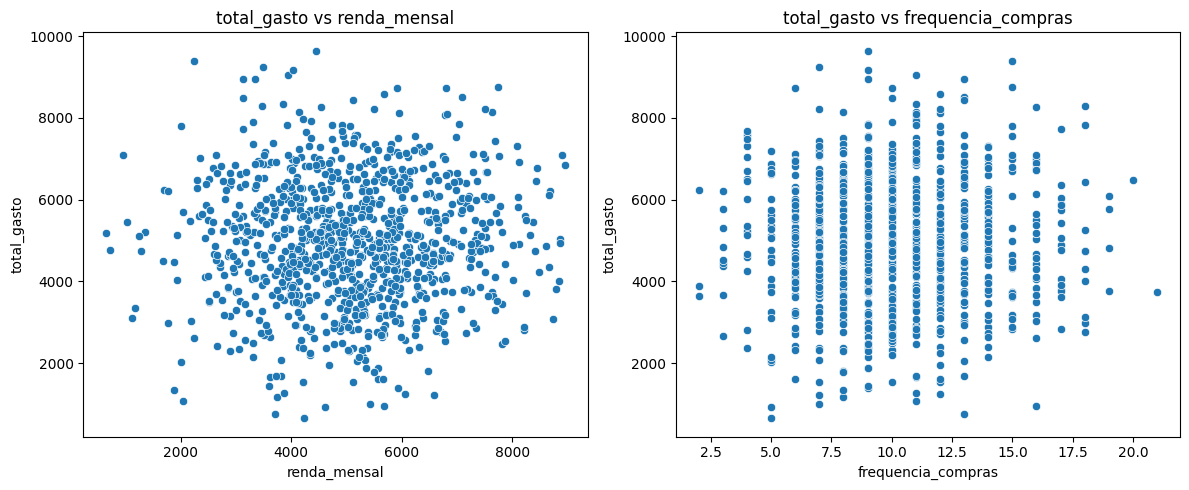


Interpretação do Modelo de Impacto no Total Gasto:
- Observe o 'Coeficiente' para cada variável independente no sumário do modelo.
- Um coeficiente positivo para 'renda_mensal' sugere que, mantendo outras variáveis constantes, clientes com maior renda tendem a ter um maior gasto total.
- Um coeficiente positivo para 'frequencia_compras' sugere que, mantendo outras variáveis constantes, clientes que compram com mais frequência tendem a ter um maior gasto total.
- O valor de 'R-squared' indica a proporção da variância no '{dependente_gasto}' que é explicada pelo modelo.
- Os valores de 'P>|t|' (p-valor) indicam a significância estatística de cada coeficiente.

--- Outra Análise: Tipo de Cliente e Total Gasto ---

Resultados do Modelo de Regressão Linear (Tipo de Cliente e Total Gasto):
                            OLS Regression Results                            
Dep. Variable:            total_gasto   R-squared:                       0.000
Model:                            OLS   Adj. R

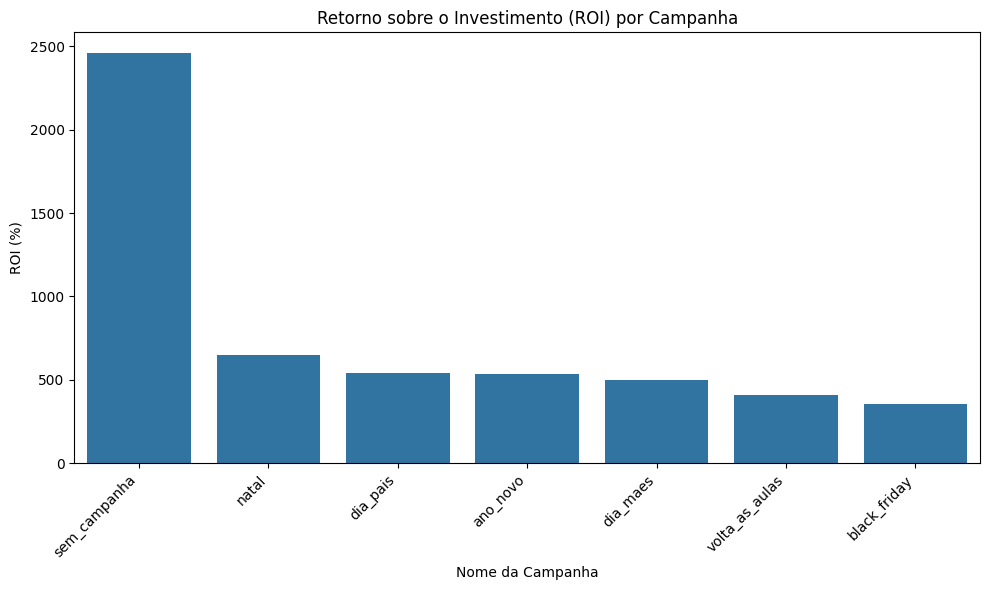

In [ ]:
import pandas as pd
from google.colab import files
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Nomes das colunas (conforme fornecido anteriormente)
coluna_id_cliente = 'cliente_id'
coluna_idade = 'idade'
coluna_renda_mensal = 'renda_mensal'
coluna_frequencia_compras = 'frequencia_compras'
coluna_total_gasto = 'total_gasto'
coluna_tipo_cliente = 'tipo_cliente'
coluna_cidade = 'cidade'
coluna_id_transacao = 'transacao_id'
coluna_id_cliente_transacao = 'cliente_id'
coluna_campanha_transacao = 'campanha'
coluna_id_campanha = 'campanha_id'
coluna_nome_campanha = 'nome_campanha'
coluna_custo_campanha = 'custo_campanha'
coluna_conversao = 'conversao'  # Assumindo que esta coluna representa o número de conversões
coluna_valor_compra = 'valor_compra'

# Função para carregar um DataFrame a partir de um arquivo CSV
def carregar_csv(nome_arquivo):
    uploaded = files.upload()
    nome_arquivo_carregado = list(uploaded.keys())[0]
    df = pd.read_csv(nome_arquivo_carregado)
    print(f"\nArquivo '{nome_arquivo_carregado}' carregado com sucesso.")
    return df

# Carregar as tabelas de Clientes, Transações e Campanhas
print("Carregue o arquivo CSV da tabela de Clientes:")
df_clientes = carregar_csv("clientes.csv")

print("\nCarregue o arquivo CSV da tabela de Transações:")
df_transacoes = carregar_csv("transacoes.csv")

print("\nCarregue o arquivo CSV da tabela de Campanhas:")
df_campanhas = carregar_csv("campanhas.csv")

# --- Análise de Regressão Linear com 'total_gasto' como variável dependente ---

print("\n--- Análise de Regressão Linear com 'total_gasto' como variável dependente ---")

# Limpeza e tratamento de dados (converter para numérico e tratar ausentes)
df_clientes[coluna_idade] = pd.to_numeric(df_clientes[coluna_idade], errors='coerce').fillna(df_clientes[coluna_idade].mean())
df_clientes[coluna_renda_mensal] = pd.to_numeric(df_clientes[coluna_renda_mensal], errors='coerce').fillna(df_clientes[coluna_renda_mensal].mean())
df_clientes[coluna_frequencia_compras] = pd.to_numeric(df_clientes[coluna_frequencia_compras], errors='coerce').fillna(df_clientes[coluna_frequencia_compras].mean())
df_clientes[coluna_total_gasto] = pd.to_numeric(df_clientes[coluna_total_gasto], errors='coerce').fillna(df_clientes[coluna_total_gasto].mean())

# Escolha das variáveis independentes para provar um ponto específico:
# Ponto a ser provado: Clientes com maior renda mensal e maior frequência de compras tendem a ter um total gasto maior.
independentes_gasto = [coluna_renda_mensal, coluna_frequencia_compras]
dependente_gasto = coluna_total_gasto

# Criar a fórmula para o modelo de regressão
formula_gasto = f"{dependente_gasto} ~ {' + '.join(independentes_gasto)}"

# Ajustar o modelo de regressão linear usando statsmodels (for análise estatística detalhada)
modelo_gasto = smf.ols(formula=formula_gasto, data=df_clientes).fit()

# Exibir os resultados do modelo
print("\nResultados do Modelo de Regressão Linear (Impacto no Total Gasto):")
print(modelo_gasto.summary())

# Visualização dos resultados (opcional, para entender a relação visualmente)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clientes[coluna_renda_mensal], y=df_clientes[coluna_total_gasto])
plt.title(f"{dependente_gasto} vs {coluna_renda_mensal}")
plt.xlabel(coluna_renda_mensal)
plt.ylabel(dependente_gasto)

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_clientes[coluna_frequencia_compras], y=df_clientes[coluna_total_gasto])
plt.title(f"{dependente_gasto} vs {coluna_frequencia_compras}")
plt.xlabel(coluna_frequencia_compras)
plt.ylabel(dependente_gasto)

plt.tight_layout()
plt.show()

print("\nInterpretação do Modelo de Impacto no Total Gasto:")
print("- Observe o 'Coeficiente' para cada variável independente no sumário do modelo.")
print(f"- Um coeficiente positivo para '{coluna_renda_mensal}' sugere que, mantendo outras variáveis constantes, clientes com maior renda tendem a ter um maior gasto total.")
print(f"- Um coeficiente positivo para '{coluna_frequencia_compras}' sugere que, mantendo outras variáveis constantes, clientes que compram com mais frequência tendem a ter um maior gasto total.")
print("- O valor de 'R-squared' indica a proporção da variância no '{dependente_gasto}' que é explicada pelo modelo.")
print("- Os valores de 'P>|t|' (p-valor) indicam a significância estatística de cada coeficiente.")

# --- Outro exemplo de ponto a ser provado: Tipo de cliente influencia no total gasto ---
print("\n--- Outra Análise: Tipo de Cliente e Total Gasto ---")

# Converter variável categórica 'tipo_cliente' em numérica usando one-hot encoding
df_clientes_encoded = pd.get_dummies(df_clientes, columns=[coluna_tipo_cliente], drop_first=True)

# Escolha das variáveis independentes (agora incluindo os tipos de cliente)
independentes_tipo = [col for col in df_clientes_encoded.columns if coluna_tipo_cliente in col]
dependente_tipo = coluna_total_gasto

formula_tipo = f"{dependente_tipo} ~ {' + '.join(independentes_tipo)}"

modelo_tipo = smf.ols(formula=formula_tipo, data=df_clientes_encoded).fit()

print("\nResultados do Modelo de Regressão Linear (Tipo de Cliente e Total Gasto):")
print(modelo_tipo.summary())

print("\nInterpretação do Modelo de Impacto do Tipo de Cliente no Total Gasto:")
print("- Os coeficientes para cada tipo de cliente (em comparação com a categoria base) indicam a diferença no gasto total em relação a esse grupo.")
print("- Um coeficiente positivo sugere que esse tipo de cliente tende a gastar mais, mantendo outras variáveis constantes (neste modelo, apenas o tipo de cliente).")

# --- Identificar o Retorno sobre o Investimento (ROI) das Campanhas (Baseado em Conversões) ---

print("\n--- Identificar o Retorno sobre o Investimento (ROI) das Campanhas (Baseado em Conversões) ---")

# Limpeza e tratamento de dados para o cálculo do ROI
df_transacoes[coluna_campanha_transacao] = df_transacoes[coluna_campanha_transacao].astype(str).fillna('Nenhuma')
df_transacoes[coluna_valor_compra] = pd.to_numeric(df_transacoes[coluna_valor_compra], errors='coerce').fillna(0)
df_campanhas[coluna_custo_campanha] = pd.to_numeric(df_campanhas[coluna_custo_campanha], errors='coerce').fillna(0)
df_campanhas[coluna_conversao] = pd.to_numeric(df_campanhas[coluna_conversao], errors='coerce').fillna(0)

# Calcular o total de valor gerado por conversões para cada campanha
valor_conversao_por_campanha = df_transacoes[df_transacoes[coluna_campanha_transacao] != 'Nenhuma'].groupby(coluna_campanha_transacao)[coluna_valor_compra].sum().reset_index()
valor_conversao_por_campanha = valor_conversao_por_campanha.rename(columns={coluna_campanha_transacao: coluna_nome_campanha, coluna_valor_compra: 'valor_total_conversoes'})

# Juntar com os dados da campanha (custo e número de conversões reportado)
roi_conversao_df = pd.merge(df_campanhas[[coluna_nome_campanha, coluna_custo_campanha, coluna_conversao]],
                            valor_conversao_por_campanha,
                            on=coluna_nome_campanha,
                            how='left').fillna(0)

# Calcular o retorno (valor total das conversões - custo da campanha)
roi_conversao_df['retorno'] = roi_conversao_df['valor_total_conversoes'] - roi_conversao_df[coluna_custo_campanha]

# Calcular o ROI
roi_conversao_df['roi'] = roi_conversao_df.apply(lambda row: (row['retorno'] / row[coluna_custo_campanha]) * 100 if row[coluna_custo_campanha] != 0 else 0, axis=1)

# Classificar as campanhas por ROI em ordem decrescente
roi_ordenado_conversao = roi_conversao_df.sort_values(by='roi', ascending=False)

print("\nRetorno sobre o Investimento (ROI) por Campanha (Baseado no Valor das Conversões):")
print(roi_ordenado_conversao[[coluna_nome_campanha, 'roi']].head())

print("\nDetalhes do ROI por Campanha (Baseado no Valor das Conversões):")
print(roi_ordenado_conversao)

# --- Visualização do ROI ---
plt.figure(figsize=(10, 6))
sns.barplot(x=coluna_nome_campanha, y='roi', data=roi_ordenado_conversao)
plt.title('Retorno sobre o Investimento (ROI) por Campanha')
plt.xlabel('Nome da Campanha')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CUSTOMER LIFETIME VALUE (CLV)

Carregue o arquivo CSV da tabela de Clientes:


Saving clientes.csv to clientes (3).csv

Arquivo 'clientes (3).csv' carregado com sucesso.

Carregue o arquivo CSV da tabela de Transações:


Saving transacoes.csv to transacoes (2).csv

Arquivo 'transacoes (2).csv' carregado com sucesso.


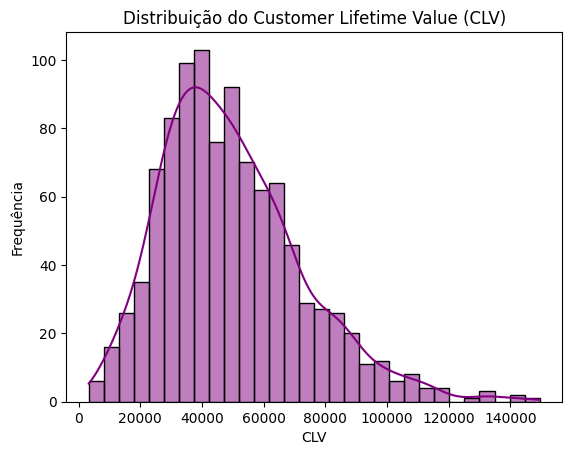


Clientes de Alto Valor (Top 20%):
    cliente_id    clv
0            1  81348
8            9  67368
11          12  68256
20          21  82524
23          24  91788

--- Estratégias de Retenção para Clientes de Alto Valor ---

**Programas de Fidelidade Exclusivos:**
- Ofereça um programa de fidelidade com benefícios diferenciados para clientes de alto valor, como descontos maiores, acesso antecipado a novos produtos, brindes exclusivos e atendimento prioritário.

**Comunicação Personalizada:**
- Desenvolva campanhas de marketing personalizadas para este grupo, com base em seu histórico de compras e preferências. Envie ofertas exclusivas e recomendações de produtos que sejam altamente relevantes para eles.

**Atendimento ao Cliente VIP:**
- Garanta que os clientes de alto valor recebam um nível de atendimento excepcional. Considere designar gerentes de conta dedicados ou oferecer canais de suporte prioritários.

**Recompensas por Indicação:**
- Incentive os clientes de alto valor a in

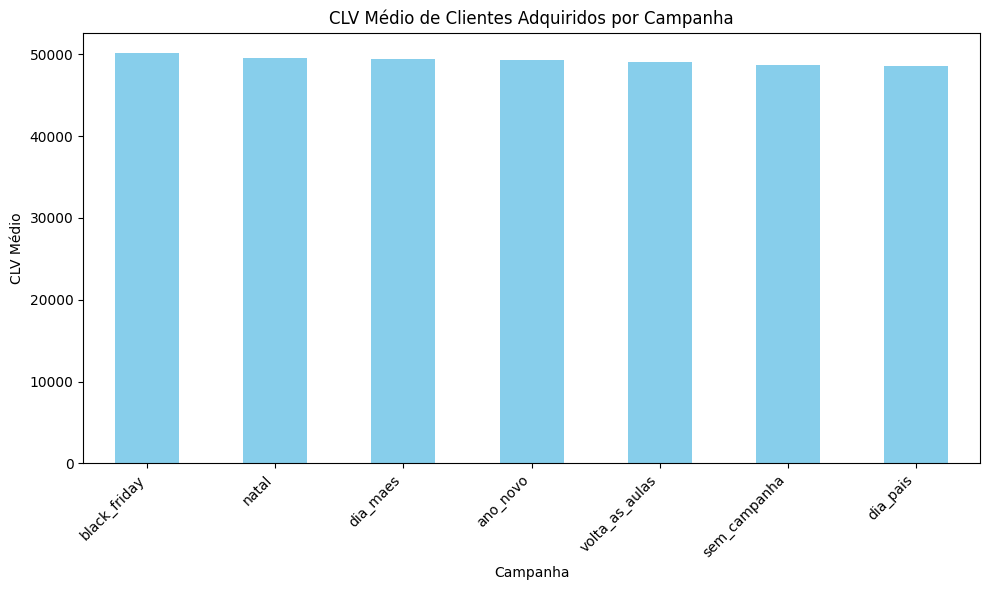


Interpretação do CLV por Campanha:
- A tabela e o gráfico acima mostram o CLV médio dos clientes que realizaram sua primeira compra associada a cada campanha.
- Campanhas com um CLV médio mais alto indicam que elas estão atraindo clientes que, ao longo do tempo (com base nos dados históricos de gasto e frequência), tendem a gerar mais valor para a empresa.
- Essas informações podem ajudar a otimizar seus esforços de marketing, direcionando mais recursos para as campanhas que adquirem clientes de maior valor a longo prazo.


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

# Função para carregar um DataFrame a partir de um arquivo CSV
def carregar_csv(nome_arquivo):
    uploaded = files.upload()
    nome_arquivo_carregado = list(uploaded.keys())[0]
    df = pd.read_csv(nome_arquivo_carregado)
    print(f"\nArquivo '{nome_arquivo_carregado}' carregado com sucesso.")
    return df

# Carregar a tabela de Clientes
print("Carregue o arquivo CSV da tabela de Clientes:")
df_clientes = carregar_csv("clientes.csv")

# Carregar a tabela de Transações (para vincular campanhas)
print("\nCarregue o arquivo CSV da tabela de Transações:")
df_transacoes = carregar_csv("transacoes.csv")

# --- Calculando CLV (simplificado) ---

df_clientes["clv"] = df_clientes["total_gasto"] * df_clientes["frequencia_compras"]

# Identificando clientes de alto valor (top 20%)
df_clientes["clv_alto_valor"] = df_clientes["clv"] > df_clientes["clv"].quantile(0.8)

# Visualizando distribuição do CLV
sns.histplot(df_clientes["clv"], bins=30, kde=True, color="purple")
plt.title("Distribuição do Customer Lifetime Value (CLV)")
plt.xlabel("CLV")
plt.ylabel("Frequência")
plt.show()

# Clientes de alto valor
clientes_alto_valor = df_clientes[df_clientes["clv_alto_valor"]]
print("\nClientes de Alto Valor (Top 20%):")
print(clientes_alto_valor[["cliente_id", "clv"]].head())

# --- Sugestões de Estratégias de Retenção para Clientes de Alto Valor ---

print("\n--- Estratégias de Retenção para Clientes de Alto Valor ---")

print("\n**Programas de Fidelidade Exclusivos:**")
print("- Ofereça um programa de fidelidade com benefícios diferenciados para clientes de alto valor, como descontos maiores, acesso antecipado a novos produtos, brindes exclusivos e atendimento prioritário.")

print("\n**Comunicação Personalizada:**")
print("- Desenvolva campanhas de marketing personalizadas para este grupo, com base em seu histórico de compras e preferências. Envie ofertas exclusivas e recomendações de produtos que sejam altamente relevantes para eles.")

print("\n**Atendimento ao Cliente VIP:**")
print("- Garanta que os clientes de alto valor recebam um nível de atendimento excepcional. Considere designar gerentes de conta dedicados ou oferecer canais de suporte prioritários.")

print("\n**Recompensas por Indicação:**")
print("- Incentive os clientes de alto valor a indicar novos clientes, oferecendo recompensas generosas por cada indicação bem-sucedida. Isso pode ajudar a atrair mais clientes de alto potencial.")

print("\n**Experiências Exclusivas:**")
print("- Convide clientes de alto valor para eventos exclusivos, workshops ou lançamentos de produtos. Isso cria um senso de pertencimento e fortalece o relacionamento.")

print("\n**Pesquisas de Satisfação e Feedback Prioritário:**")
print("- Solicite feedback regularmente a este grupo e dê prioridade às suas sugestões. Isso demonstra que a opinião deles é valorizada.")

print("\n**Bônus e Recompensas Surpresa:**")
print("- Envie bônus, descontos ou pequenos presentes inesperados para surpreender e encantar seus clientes de alto valor, fortalecendo a lealdade.")

# --- Comparando o CLV de clientes adquiridos por diferentes campanhas ---

# Mergear df_transacoes com df_clientes para obter informações do cliente e da campanha
df_merged = pd.merge(df_transacoes, df_clientes, left_on='cliente_id', right_on='cliente_id', how='left')

# Calcular o CLV médio por campanha
clv_por_campanha = df_merged.groupby('campanha')['clv'].mean().sort_values(ascending=False)

print("\n--- CLV Médio por Campanha de Aquisição ---")
print(clv_por_campanha)

# Visualizando o CLV médio por campanha
plt.figure(figsize=(10, 6))
clv_por_campanha.plot(kind='bar', color='skyblue')
plt.title('CLV Médio de Clientes Adquiridos por Campanha')
plt.xlabel('Campanha')
plt.ylabel('CLV Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nInterpretação do CLV por Campanha:")
print("- A tabela e o gráfico acima mostram o CLV médio dos clientes que realizaram sua primeira compra associada a cada campanha.")
print("- Campanhas com um CLV médio mais alto indicam que elas estão atraindo clientes que, ao longo do tempo (com base nos dados históricos de gasto e frequência), tendem a gerar mais valor para a empresa.")
print("- Essas informações podem ajudar a otimizar seus esforços de marketing, direcionando mais recursos para as campanhas que adquirem clientes de maior valor a longo prazo.")